<a href="https://colab.research.google.com/github/abarrie2/cs598-dlh-project/blob/main/DL4H_Team_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

The paper selected for this project is titled "Predicting intraoperative hypotension using deep learning with waveforms of arterial blood pressure, electroencephalogram, and electrocardiogram: Retrospective study" [1].

## Background of the problem

The problem being investigated by this study relates to the prediction of Intraoperative Hypotension (IOH). IOH is an event that can occur during durgery where there is a drop in mean arterial blood pressure to less than 65 mmHg. This event is important to consider because it can be associated with multiple negative postoperative outcomes including postoperative myocardial infarction, acute kidney injury, and postoperative mortality. There are multiple factors that can contribute to instances of IOH, and if there were an ability to identify IOH in advance then medical personnel could take steps to mitigate the IOH event. This is important because a prevention or minimization of IOH events may reduce the probability of the negative postoperative outcomes described above. The paper is an investigation into the problem of IOH event prediction, specifically predicting whether, based on vital signals, there will be an IOH event in 7, 5, 10, or 15 minutes time.

Our selected paper is an extension of another study titled "Machine-learning Algorithm to Predict Hypotension Based on High-fidelity Arterial Pressure Waveform Analysis" [2], which attempted to train a model to predict instances of Intraoperative Hypotension using Arterial Blood Pressure (ABP) signals. While that original paper focused solely on training against arterial blood pressure (ABP) waveforms, our selected paper seeks to measure whether predictive outcomes are improved by incorporating additional vital signals. Specifically, the paper investigates the impact to quality of IOH prediction by training not only on ABP signals, but also electrocardiogram (ECG) signals, electroencephalogram (EEG) signals, and various combination of all three.

The key difficulty in this area of research is that the benefit of a predictive model would occur only by the use of such a model within a surgical environment. This paper does not aim to demonstrate the feasibility of operating a realtime signal analysis model, instead focusing on the potential predictive benefits of incorporating vital signals beyond ABP in order to improve the quality of predictions for IOH events.

While this paper is an investigation into the augmentation of ABP signal analysis with additional vital signals, the state of the art for IOH prediction involves models that have been incorporated into medical devices that are deployed in the operating room. A recently published study titled "AcumenTM hypotension prediction index guidance for prevention and treatment of hypotension in noncardiac surgery: a prospective, single-arm, multicenter trial" [3] wherein the predictive models were used during surgeries. The participants clinicians were warned by the predictive technology and enabled to intervene and prevent or reduce the duration of IOH events. The conclusion of the AcumenTM paper determined that the use of such prediction software was associated with a clinically meaningful reudction in the duration of IOH events, but that further studies are required to investigate whether these models could be used to prevent IOH events entirely.

## Our Paper

The paper proposed that training a model on some combination of ABP, ECG, and EEG signals would improve result in a model that would function better at predicting IOH. The key innovation relative to preceding research in this area is the inclusion of EEG and ECG signal data in the operation of the model, whereas preceding research focused primarily on making predictions based solely on ABP data. The paper concluded that the combination of ABP and EEG signals may result in improved model performance when predicting IOH events. The experimental results demonstrated that by both area under the receiver operating characteristic (AUROC) and area under the precision-recall curve (AUPRC) measures, a model trained on the combination of ABP and EEG scored higher than a model trained solely on ABP across all prediction intervals (i.e., for predictions 7, 5, 10, and 15 minutes ahead of an IOH event). The main contribution to the research regime for prediction IOH is that it validates the hypothesis that a combination of vital signals able to monitored during surgery will improve predictive quality. While that benefit is marginal, this research provides a quantifiable measure to demonstrate the magnitude of this improvement.

# Scope of Reproducibility:

The original paper investigated the following hypotheses:

1.   Hypothesis 1: Using AUROC and AUPRC scores, a model using ABP and ECG will perform better than a model using only ABP.
2.   Hypothesis 2: Using AUROC and AUPRC scores, a model using ABP and EEG will perform better than a model using only ABP.
3.   Hypothesis 3: Using AUROC and AUPRC scores, a model using ABP, EEG, and ECG will perform better than a model using only ABP.

Based on the results described in the original paper, we expect that Hypothesis 2 will be confirmed, and that Hypotheses 1 and 3 will not be confirmed. In order to perform the corresponding experiments, we will implement a CNN-based model that can be configured to train and infer using the following four model variations:

1.   ABP data alone
2.   ABP and ECG data
3.   ABP and EEG data
4.   ABP, ECG, and EEG data

We will measure the performance of these configurations using the same AUROC and AUPRC metrics as used in the original paper. To test hypothesis 1 we will compare the AUROC and AUPRC measures between model variation 1 and model variation 2. To test hypothesis 2 we will compare the AUROC and AUPRC measures between model variation 1 and model variation 3. To test hypothesis 3 we will compare the AUROC and AUPRC measures between model variation 1 and model variation 4. For all of the above measures and experiment combinations, we are going to be operating multiple experiments, one where the time-to-IOH event prediction will be broken out into the following times:

1. 3 minutes before event
2. 5 minutes before event
3. 10 minutes before event
4. 15 minutes before event

[note to self: should we include Table 3 from the original paper (auroc/auprc/sensitive/specificity/threshold scores for all signal combinations)]

[note to self: should we include Figure 4 from the original paper (charts comparing risk indices for ABP, EEG, ABP+EEG)]


# Methodology

TODO for draft: plain english summary of the objectives of all of the code sections within the methodology section.

### Create environment

Create `conda` environment for the project using the `environment.yml` file:

```bash
conda env create --prefix .envs/dlh-team24 -f environment.yml
```

Activate the environment with:
```bash
conda activate .envs/dlh-team24
```

In [150]:
#install vitaldb
%pip install vitaldb

# Import packages
import os
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset
import vitaldb

import torch.nn as nn
import torch.nn.functional as F
from tqdm import tqdm
from datetime import datetime

#from google.colab import drive


Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.


##  Data

TODO for draft: author this section

Data includes raw data (MIMIC III tables), descriptive statistics (our homework questions), and data processing (feature engineering).
  * Source of the data: where the data is collected from; if data is synthetic or self-generated, explain how. If possible, please provide a link to the raw datasets.
  * Statistics: include basic descriptive statistics of the dataset like size, cross validation split, label distribution, etc.
  * Data process: how do you munipulate the data, e.g., change the class labels, split the dataset to train/valid/test, refining the dataset.
  * Illustration: printing results, plotting figures for illustration.
  * You can upload your raw dataset to Google Drive and mount this Colab to the same directory. If your raw dataset is too large, you can upload the processed dataset and have a code to load the processed dataset.

### Set Up Local Data Caches

Since the VitalDB data is static, local copies are stored and reused to avoid expensive downloads and to speed up data processing.

The default directory defined below is already in the project `.gitignore` file. If later modified, it should also be added to the project `.gitignore`.

In [151]:
VITALDB_CACHE = './vitaldb_cache'
VITAL_ALL = 'vital_all'
VITAL_MINI = 'vital_mini'
VITAL_METADATA = 'metadata'

In [152]:
if os.name == 'nt':
  # windows variant
  if not os.path.exists(VITALDB_CACHE):
    os.mkdir(VITALDB_CACHE)
  if not os.path.exists(f'{VITALDB_CACHE}/{VITAL_ALL}'):
    os.mkdir(f'{VITALDB_CACHE}/{VITAL_ALL}')
  if not os.path.exists(f'{VITALDB_CACHE}/{VITAL_MINI}'):
    os.mkdir(f'{VITALDB_CACHE}/{VITAL_MINI}')
  if not os.path.exists(f'{VITALDB_CACHE}/{VITAL_METADATA}'):
    os.mkdir(f'{VITALDB_CACHE}/{VITAL_METADATA}')

  print(os.listdir(VITALDB_CACHE))
else:
  # mac/linux variant
  !mkdir -p $VITALDB_CACHE
  !mkdir -p $VITALDB_CACHE/$VITAL_ALL
  !mkdir -p $VITALDB_CACHE/$VITAL_MINI
  !mkdir -p $VITALDB_CACHE/$VITAL_METADATA
  !ls -l $VITALDB_CACHE

['metadata', 'vital_all', 'vital_mini']


### OSFS Bulk Data Download

**This step is not required, but will significantly speed up downstream processing and avoid a high volume of API requests to the VitalDB web site.**

The cache population code checks if OSFS bulk download data of VitalDB vital files is locally available.

- Manually downloaded the OSF Store archives from the following site: https://osf.io/dtc45/
    - `Vital Files 0001-2000`
    - `Vital Files 2001-4000`
    - `Vital Files 4001-6388`
- Once the `OSF Storage (United States)` link is clicked a `Download as zip` link will appear.
- Once downloaded, extract each of the 3 zip archives.
- Move all files from each of the unzip directories into the `${VITALDB_CACHE}/${VITAL_ALL}` directory.

In [153]:
# Returns the Pandas DataFrame for the specified dataset.
#   One of 'cases', 'labs', or 'trks'
# If the file exists locally, create and return the DataFrame.
# Else, download and cache the csv first, then return the DataFrame.
def vitaldb_dataframe_loader(dataset_name):
    if dataset_name not in ['cases', 'labs', 'trks']:
        raise ValueError(f'Invalid dataset name: {dataset_name}')
    file_path = f'{VITALDB_CACHE}/{VITAL_METADATA}/{dataset_name}.csv'
    if os.path.isfile(file_path):
        print(f'{dataset_name}.csv exists locally.')
        df = pd.read_csv(file_path)
        return df
    else:
        print(f'downloading {dataset_name} and storing in the local cache for future reuse.')
        df = pd.read_csv(f'https://api.vitaldb.net/{dataset_name}')
        df.to_csv(file_path, index=False)
        return df

# Cases

In [154]:
cases = vitaldb_dataframe_loader('cases')
cases = cases.set_index('caseid')
cases.shape

cases.csv exists locally.


(6388, 73)

In [155]:
cases.index.nunique()

6388

In [156]:
cases.head()

,subjectid,casestart,caseend,anestart,aneend,opstart,opend,adm,dis,icu_days,...,intraop_colloid,intraop_ppf,intraop_mdz,intraop_ftn,intraop_rocu,intraop_vecu,intraop_eph,intraop_phe,intraop_epi,intraop_ca
caseid,,,,,,,,,,,,,,,,,,,,,
1,5955,0,11542,-552,10848.0,1668,10368,-236220,627780,0,...,0,120,0.0,100,70,0,10,0,0,0
2,2487,0,15741,-1039,14921.0,1721,14621,-221160,1506840,0,...,0,150,0.0,0,100,0,20,0,0,0
3,2861,0,4394,-590,4210.0,1090,3010,-218640,40560,0,...,0,0,0.0,0,50,0,0,0,0,0
4,1903,0,20990,-778,20222.0,2522,17822,-201120,576480,1,...,0,80,0.0,100,100,0,50,0,0,0
5,4416,0,21531,-1009,22391.0,2591,20291,-67560,3734040,13,...,0,0,0.0,0,160,0,10,900,0,2100


In [157]:
cases['sex'].value_counts()

sex
M    3243
F    3145
Name: count, dtype: int64

# Tracks

In [158]:
trks = vitaldb_dataframe_loader('trks')
trks = trks.set_index('caseid')
trks.shape

trks.csv exists locally.


(486449, 2)

In [159]:
trks.index.nunique()

6388

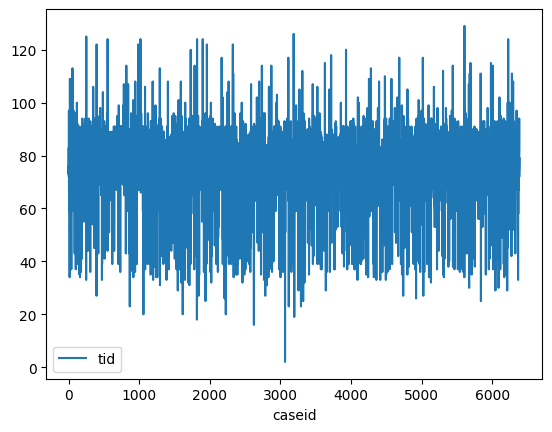

In [160]:
trks.groupby('caseid')[['tid']].count().plot();

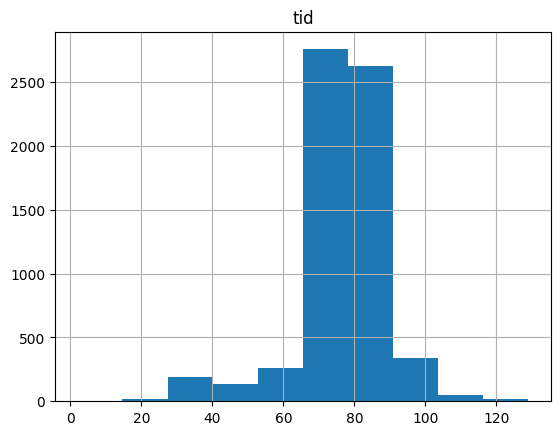

In [161]:
trks.groupby('caseid')[['tid']].count().hist();

In [162]:
trks.groupby('tname').count().sort_values(by='tid', ascending=False)

,tid
tname,
Solar8000/HR,6387
Solar8000/PLETH_SPO2,6386
Solar8000/PLETH_HR,6386
Primus/CO2,6362
Primus/PAMB_MBAR,6361
...,...
Orchestra/AMD_VOL,1
Solar8000/ST_V5,1
Orchestra/NPS_VOL,1


## Parameters of Interest

### Hemodynamic Parameters Reference
https://vitaldb.net/dataset/?query=overview#h.f7d712ycdpk2

**Solar8000/ART_MBP**

mean blood pressure

Parameter, Description, Type/Hz, Unit

Solar8000/ART_MBP, Mean arterial pressure, N, mmHg

In [163]:
trks[trks['tname'].str.contains('Solar8000/ART_MBP')].shape

(3724, 2)

**SNUADC/ART**

arterial blood pressure waveform

Parameter, Description, Type/Hz, Unit

SNUADC/ART, Arterial pressure wave, W/500, mmHg

In [164]:
trks[trks['tname'].str.contains('SNUADC/ART')].shape

(3645, 2)

**SNUADC/ECG_II**

electrocardiogram waveform

Parameter, Description, Type/Hz, Unit

SNUADC/ECG_II, ECG lead II wave, W/500, mV

In [165]:
trks[trks['tname'].str.contains('SNUADC/ECG_II')].shape

(6355, 2)

**BIS/EEG1_WAV**

electroencephalogram waveform

Parameter, Description, Type/Hz, Unit

BIS/EEG1_WAV, EEG wave from channel 1, W/128, uV

In [166]:
trks[trks['tname'].str.contains('BIS/EEG1_WAV')].shape

(5871, 2)

# Cases of Interest

These are the subset of case ids for which modelling and analysis will be performed based upon inclusion criteria and waveform data availability.

In [167]:
TRACK_NAMES = ['SNUADC/ART', 'SNUADC/ECG_II', 'BIS/EEG1_WAV']
TRACK_SRATES = [500, 500, 128]

In [168]:
# As in the paper, select cases which meet the following criteria:
#
# For patients, the inclusion criteria were as follows:
# (1) adults (age >= 18)
# (2) administered general anaesthesia
# (3) undergone non-cardiac surgery. 
#
# For waveform data, the inclusion criteria were as follows:
# (1) no missing monitoring for ABP, ECG, and EEG waveforms
# (2) no cases containing false events or non-events due to poor signal quality
#     (checked in second stage of data preprocessing)

# adult
inclusion_1 = cases.loc[cases['age'] >= 18].index
print(f'{len(cases)-len(inclusion_1)} cases excluded, {len(inclusion_1)} remaining due to age criteria')

# general anesthesia
inclusion_2 = cases.loc[cases['ane_type'] == 'General'].index
print(f'{len(cases)-len(inclusion_2)} cases excluded, {len(inclusion_2)} remaining due to anesthesia criteria')

# non-cardiac surgery
inclusion_3 = cases.loc[
    ~cases['opname'].str.contains("cardiac", case=False)
    & ~cases['opname'].str.contains("aneurysmal", case=False)
].index
print(f'{len(cases)-len(inclusion_3)} cases excluded, {len(inclusion_3)} remaining due to non-cardiac surgery criteria')

# ABP, ECG, EEG waveforms
inclusion_4 = trks.loc[trks['tname'].isin(TRACK_NAMES)].index.value_counts()
inclusion_4 = inclusion_4[inclusion_4 == len(TRACK_NAMES)].index
print(f'{len(cases)-len(inclusion_4)} cases excluded, {len(inclusion_4)} remaining due to missing waveform data')

cases_of_interest_idx = inclusion_1 \
    .intersection(inclusion_2) \
    .intersection(inclusion_3) \
    .intersection(inclusion_4)

cases_of_interest = cases.loc[cases_of_interest_idx]

print()
print(f'{cases_of_interest_idx.shape[0]} out of {cases.shape[0]} total cases remaining after exclusions applied')

57 cases excluded, 6331 remaining due to age criteria
345 cases excluded, 6043 remaining due to anesthesia criteria
14 cases excluded, 6374 remaining due to non-cardiac surgery criteria
3019 cases excluded, 3369 remaining due to missing waveform data

3296 out of 6388 total cases remaining after exclusions applied


In [169]:
cases_of_interest.head(n=5)

,subjectid,casestart,caseend,anestart,aneend,opstart,opend,adm,dis,icu_days,...,intraop_colloid,intraop_ppf,intraop_mdz,intraop_ftn,intraop_rocu,intraop_vecu,intraop_eph,intraop_phe,intraop_epi,intraop_ca
caseid,,,,,,,,,,,,,,,,,,,,,
1,5955,0,11542,-552,10848.0,1668,10368,-236220,627780,0,...,0,120,0.0,100,70,0,10,0,0,0
3,2861,0,4394,-590,4210.0,1090,3010,-218640,40560,0,...,0,0,0.0,0,50,0,0,0,0,0
4,1903,0,20990,-778,20222.0,2522,17822,-201120,576480,1,...,0,80,0.0,100,100,0,50,0,0,0
7,5124,0,15770,477,14817.0,3177,14577,-154320,623280,3,...,0,0,0.0,0,120,0,0,0,0,0
10,2175,0,20992,-1743,21057.0,2457,19857,-220740,3580860,1,...,0,90,0.0,0,110,0,20,500,0,600


# Tracks of Interest

These are the subset of tracks (waveforms) for the cases of interest identified above.

In [170]:
# A single case maps to one or more waveform tracks. Select only the tracks required for analysis.
trks_of_interest = trks.loc[cases_of_interest_idx][trks.loc[cases_of_interest_idx]['tname'].isin(TRACK_NAMES)]
trks_of_interest.shape

(9888, 2)

In [171]:
trks_of_interest.head(n=5)

,tname,tid
caseid,,
1,BIS/EEG1_WAV,0aa685df768489a18a5e9f53af0d83bf60890c73
1,SNUADC/ART,724cdd7184d7886b8f7de091c5b135bd01949959
1,SNUADC/ECG_II,8c9161aaae8cb578e2aa7b60f44234d98d2b3344
3,BIS/EEG1_WAV,3a3fe9248e00cd20c3442960d92405c4bb405a05
3,SNUADC/ART,54be86b8ba1eb9c42a572b5824310eb6c9f19aef


In [172]:
trks_of_interest_idx = trks_of_interest.set_index('tid').index
trks_of_interest_idx.shape

(9888,)

## Build Tracks Cache for Local Processing

Tracks data are large and therefore expensive to download every time used.
By default, the vital file format stores all tracks for each case internally. Since only certain tracks per case are required, each vital file can be further truncated to only store the tracks for needed waveforms.

In [173]:
# Maximum number of cases of interest for which to download data.
# Set to a small value for demo purposes, else set to None to disable and download all.
#MAX_CASES = None
MAX_CASES = 20

In [174]:
# Trim cases of interest to MAX_CASES
if MAX_CASES:
    cases_of_interest_idx = cases_of_interest_idx[:MAX_CASES]

In [276]:
# Ensure the full vital file dataset is available for cases of interest.
count_downloaded = 0
count_present = 0

#for i, idx in enumerate(cases.index):
for i, idx in enumerate(cases_of_interest_idx):
    if MAX_CASES and i >= MAX_CASES:
        break

    full_path = f'{VITALDB_CACHE}/{VITAL_ALL}/{idx:04d}.vital'
    if not os.path.isfile(full_path):
        print(f'Missing vital file: {full_path}')
        # Download and save the file.
        vf = vitaldb.VitalFile(idx)
        vf.to_vital(full_path)
        count_downloaded += 1
    else:
        count_present += 1

print()
print(f'Count of cases of interest:           {cases_of_interest_idx.shape[0]}')
print(f'Count of vital files downloaded:      {count_downloaded}')
print(f'Count of vital files already present: {count_present}')


Count of cases of interest:           20
Count of vital files downloaded:      0
Count of vital files already present: 20


In [277]:
# Convert vital files to "mini" versions including only the subset of tracks based on TRACK_NAMES defined above.
# Only perform conversion for the cases of interest.
# NOTE: If this cell is interrupted, it can be restarted and will continue where it left off.
count_minified = 0
count_present = 0

for i, idx in enumerate(cases_of_interest_idx):
    if MAX_CASES and i >= MAX_CASES:
        break
    
    full_path = f'{VITALDB_CACHE}/{VITAL_ALL}/{idx:04d}.vital'
    mini_path = f'{VITALDB_CACHE}/{VITAL_MINI}/{idx:04d}_mini.vital'
    if not os.path.isfile(mini_path):
        print(f'Creating mini vital file: {idx}')
        vf = vitaldb.VitalFile(full_path, TRACK_NAMES)
        vf.to_vital(mini_path)
        count_minified += 1
    else:
        count_present += 1

print()
print(f'Count of cases of interest:           {cases_of_interest_idx.shape[0]}')
print(f'Count of vital files minified:        {count_minified}')
print(f'Count of vital files already present: {count_present}')


Count of cases of interest:           20
Count of vital files minified:        0
Count of vital files already present: 20


In [177]:
# Exclude cases where ABP j signal quality (jSQI) < 0.8
# TODO: Implement jSQI function
# TODO: Filter cases with jSQI < 0.8

In [278]:
# Generate hypotensive events
# Hypotensive events are defined as a 1-minute interval with sustained ABP of less than 65 mmHg
# Note: Hypotensive events should be at least 20 minutes apart to minimize potential residual effects from previous events
# TODO: Implement hypotension event generation function
# TODO: Generate hypotension events

# Generate hypotension non-events
# To sample non-events, 30-minute segments where the ABP was above 75 mmHG were selected, and then
# three one-minute samples of each waveform were obtained from the middle of the segment
# TODO: Implement hypotension non-event generation function
# TODO: Generate hypotension non-events

# XXX Create dummy events with random labels for now
def generate_dummy_data(cases_of_interest_idx):
    # Initialize an empty DataFrame
    generated_data = []
    
    # Loop through each case index
    for case in cases_of_interest_idx:
        # Generate a random number of rows between 5 and 20
        num_rows = random.randint(5, 20)
        
        # Generate data for each row
        for _ in range(num_rows):
            starttime = random.randint(0, 1200)
            endtime = starttime + 60
            label = random.randint(0, 1)
            
            # Append the data to the DataFrame
            generated_data.append([
                case,
                starttime,
                endtime,
                label
            ])
    
    return pd.DataFrame(generated_data, columns=['caseidx', 'starttime', 'endtime', 'label'])
samples = generate_dummy_data(cases_of_interest_idx)
samples

,caseidx,starttime,endtime,label
0,1,152,212,0
1,1,93,153,1
2,1,85,145,0
3,1,331,391,0
4,1,878,938,1
...,...,...,...,...
265,38,89,149,1
266,38,567,627,0
267,38,552,612,0
268,38,543,603,0


In [279]:
# Preprocess data tracks

# ABP waveforms are used without further pre-processing
# ECG waveforms are band-pass filtered between 1 and 40 Hz, and Z-score normalized
# EEG waveforms are band-pass filtered between 0.5 and 40 Hz

In [280]:
# Split data into training, validation, and test sets
# Use 6:1:3 ratio and prevent samples from a single case from being split across different sets
# Note: number of samples at each time point is not the same, because the first event can occur before the 3/5/10/15 minute mark

# Set target sizes
train_ratio = 0.6
val_ratio = 0.1
test_ratio = 1 - train_ratio - val_ratio # ensure ratios sum to 1

# Assume that on average cases have the ~same number of events so we can split by case rather than event
# Note: this means that the ratios will be approximate

# Get unique cases
unique_cases = samples['caseidx'].unique()

# Split cases into train and other
train_caseidx, other_caseidx = train_test_split(unique_cases, test_size=(1 - train_ratio), random_state=42)
# Split other into val and test
val_caseidx, test_caseidx = train_test_split(other_caseidx, test_size=(test_ratio / (1 - train_ratio)), random_state=42)

# Create datasets
samples_train = samples[samples['caseidx'].isin(train_caseidx)]
samples_val = samples[samples['caseidx'].isin(val_caseidx)]
samples_test = samples[samples['caseidx'].isin(test_caseidx)]

# Check how many samples are in each set
print(f"Train samples: {len(samples_train)}, ({len(samples_train) / len(samples):.2%})")
print(f"Val samples: {len(samples_val)}, ({len(samples_val) / len(samples):.2%})")
print(f"Test samples: {len(samples_test)}, ({len(samples_test) / len(samples):.2%})")

Train samples: 157, (58.15%)
Val samples: 20, (7.41%)
Test samples: 93, (34.44%)


In [302]:
# Create vitalDataset class
class vitalDataset(Dataset):
    def __init__(self, file_dir, samples, track_names, track_srates_hz):
        # samples should be a list of (caseidx, starttime, endtime, label)
        self.file_dir = file_dir
        self.samples = samples
        self.track_names = track_names
        self.track_srates_hz = track_srates_hz
        self.vf_dict = {}
        self.rate_dict = {}

        self.ABP_TRACK_NAME = "SNUADC/ART"
        self.ECG_TRACK_NAME = "SNUADC/ECG_II"
        self.EEG_TRACK_NAME = "BIS/EEG1_WAV"
        self.rate_dict[self.ABP_TRACK_NAME] = 500
        self.rate_dict[self.ECG_TRACK_NAME] = 500
        self.rate_dict[self.EEG_TRACK_NAME] = 128

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        # Get metadata for this event
        caseidx, starttime, endtime, label = self.samples.iloc[idx]

        # Load vital file
        # commented version is for the full vital file
        # file_path = os.path.join(self.file_dir, f"{caseidx:04d}.vital")
        file_path = os.path.join(self.file_dir, f"{caseidx:04d}_mini.vital")

        if file_path not in self.vf_dict:
          print(f"[{datetime.now()}] Loading vital file {file_path}")
          # TODO in-mem filecache has no pruning mechanism. will bloat dramatically if full dataset used
          vf = vitaldb.VitalFile(file_path, self.track_names)
          # Crop samples to target interval
          vf.crop(starttime, endtime)
          self.vf_dict[file_path] = vf
          
        # pull parsed VitalFile object from in-mem cache rather than parse same input file multiple times for each segment of interest
        vf = self.vf_dict[file_path]

        abp = None
        eeg = None
        ecg = None
        # Populate each track
        for i, (track_name, rate) in enumerate(zip(self.track_names, self.track_srates_hz)):
            # Get samples for this track
            track_samples, _ = vf.get_samples(track_name, 1/rate)
            #track_samples = vf.to_numpy(track_name, 1/rate)
            # Convert to tensor and store in samples
            start = int((endtime-starttime)*rate)
            end = start + int((endtime-starttime)*rate)

            # for some reason only pulling out one minute with each read
            #interval_data = torch.tensor(track_samples[start:end])
            interval_data = torch.tensor(track_samples[0:end-start])
            
            # print(f"loading {track_name} from {starttime} ({start}) to {endtime} ({end}) track length {len(track_samples)}")
            if track_name == self.ABP_TRACK_NAME:
                abp = interval_data
            elif track_name == self.ECG_TRACK_NAME:
                ecg = interval_data
            elif track_name == self.EEG_TRACK_NAME:
                eeg = interval_data

        return abp, ecg, eeg, label

In [303]:
train_dataset = vitalDataset(f'{VITALDB_CACHE}/{VITAL_MINI}/', samples_train, TRACK_NAMES, TRACK_SRATES)
val_dataset = vitalDataset(f'{VITALDB_CACHE}/{VITAL_MINI}/', samples_val, TRACK_NAMES, TRACK_SRATES)
test_dataset = vitalDataset(f'{VITALDB_CACHE}/{VITAL_MINI}/', samples_test, TRACK_NAMES, TRACK_SRATES)

BATCH_SIZE = 1
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

In [304]:
# dir and function to load raw data
raw_data_dir = '/content/gdrive/My Drive/Colab Notebooks/<path-to-raw-data>'

def load_raw_data(raw_data_dir):
  # implement this function to load raw data to dataframe/numpy array/tensor
  return None

raw_data = load_raw_data(raw_data_dir)

# calculate statistics
def calculate_stats(raw_data):
  # implement this function to calculate the statistics
  # it is encouraged to print out the results
  return None

# process raw data
def process_data(raw_data):
    # implement this function to process the data as you need
  return None

processed_data = process_data(raw_data)

''' you can load the processed data directly
processed_data_dir = '/content/gdrive/My Drive/Colab Notebooks/<path-to-raw-data>'
def load_processed_data(raw_data_dir):
  pass

'''

" you can load the processed data directly\nprocessed_data_dir = '/content/gdrive/My Drive/Colab Notebooks/<path-to-raw-data>'\ndef load_processed_data(raw_data_dir):\n  pass\n\n"

##   Model

This model is an implementation of the CNN described in our selected paper. It can train and infer using 1, 2, or 3 different signal categories. I.e., the same model definition can use different initialization parameters to drive a model that uses:
 * ABP alone
 * EEG alone
 * ECG alone
 * ABP + EEG
 * ABP + ECG
 * EEG + ECG
 * ABP + EEG + ECG

### Model Architecture

[TODO for final report - embed Figure 2 from the original paper]

Due to different frequency of the input signal, the hyperparameters will differ for EEG signals as opposed to ABP and ECG signals, but aside from that the general model architecture will be the same for each signal. The model is defined by a residual block containing 7 layers which will be described below. Each signal will pass through 12 instances of the residual block before being flattened and passed through a linear layer ultimately producing 32 parameters. Each signal path will then be concatenated (unless only one signal was configured for use). This concatenated set will be passed through two more linear layers to produce a single vector representing the IOH index. A threshold value would be subsequently applied to this index to perform the binary classification determining whether or not an IOH event is being predicted. This means that each signal passes through 85 layers before concatenation, and then 2 more linear layers before the prediction measure is produced.

### Residual Block Definition

Each residual block is made of the following seven layers:
 
 * Batch normalization
 * ReLU
 * Dropout (0.5)
 * 1D convolution
 * Batch normalization
 * ReLU
 * 1D convolution

Each block also features a skip connection.

#### Residual Block Parameters
##### ECG and ABP
 * Residual block 1:
   * Input size: 30000 * 1
   * Kernel Size 15
   * Channel Size 2
   * Output size: 15000 * 2 (downsize via Max Pooling)
 * Residual block 2:
   * Input size: 15000 * 2
   * Kernel Size 15
   * Channel Size 2
   * Output size: 15000 * 2
 * Residual block 3:
   * Input size: 15000 * 2
   * Kernel Size 15
   * Channel Size 2
   * Output size: 7500 * 2 (downsize via Max Pooling)
 * Residual block 4:
   * Input size: 7500 * 2
   * Kernel Size 15
   * Channel Size 2
   * Output size: 7500 * 2
 * Residual block 5:
   * Input size: 7500 * 2
   * Kernel Size 15
   * Channel Size 2
   * Output size: 3750 * 2 (downsize via Max Pooling)
 * Residual block 6:
   * Input size: 3750 * 2
   * Kernel Size 15
   * Channel Size 4
   * Output size: 3750 * 4
 * Residual block 7:
   * Input size: 3750 * 4
   * Kernel Size 7
   * Channel Size 4
   * Output size: 1875 * 4 (downsize via Max Pooling)
 * Residual block 8:
   * Input size: 1875 * 4
   * Kernel Size 7
   * Channel Size 4
   * Output size: 1875 * 4
 * Residual block 9:
   * Input size: 1875 * 4
   * Kernel Size 7
   * Channel Size 4
   * Output size: 938 * 4 (downsize via Max Pooling)
 * Residual block 10:
   * Input size: 938 * 4
   * Kernel Size 7
   * Channel Size 6
   * Output size: 938 * 6
 * Residual block 11:
   * Input size: 938 * 6
   * Kernel Size 7
   * Channel Size 4
   * Output size: 496 * 6 (downsize via Max Pooling)
 * Residual block 12:
   * Input size: 496 * 6
   * Kernel Size 7
   * Channel Size 6
   * Output size: 496 * 6
##### EEG
 * Residual block 1:
   * Input size: 7680 * 1
   * Kernel Size 7
   * Channel Size 2
   * Output size: 3840 * 2 (downsize via Max Pooling)
 * Residual block 2:
   * Input size: 3840 * 2
   * Kernel Size 7
   * Channel Size 2
   * Output size: 3840 * 2
 * Residual block 3:
   * Input size: 3840 * 2
   * Kernel Size 7
   * Channel Size 2
   * Output size: 1920 * 2 (downsize via Max Pooling)
 * Residual block 4:
   * Input size: 1920 * 2
   * Kernel Size 7
   * Channel Size 2
   * Output size: 1920 * 2
 * Residual block 5:
   * Input size: 1920 * 2
   * Kernel Size 7
   * Channel Size 2
   * Output size: 960 * 2 (downsize via Max Pooling)
 * Residual block 6:
   * Input size: 960 * 2
   * Kernel Size 7
   * Channel Size 4
   * Output size: 960 * 4
 * Residual block 7:
   * Input size: 960 * 4
   * Kernel Size 3
   * Channel Size 4
   * Output size: 480 * 4 (downsize via Max Pooling)
 * Residual block 8:
   * Input size: 480 * 4
   * Kernel Size 3
   * Channel Size 4
   * Output size: 480 * 4
 * Residual block 9:
   * Input size: 480 * 4
   * Kernel Size 3
   * Channel Size 4
   * Output size: 240 * 4 (downsize via Max Pooling)
 * Residual block 10:
   * Input size: 240 * 4
   * Kernel Size 3
   * Channel Size 6
   * Output size: 240 * 6
 * Residual block 11:
   * Input size: 240 * 6
   * Kernel Size 3
   * Channel Size 4
   * Output size: 120 * 6 (downsize via Max Pooling)
 * Residual block 12:
   * Input size: 120 * 6
   * Kernel Size 3
   * Channel Size 6
   * Output size: 120 * 6

### Training Objectives
Our model replicates the loss function and optimizer decisions used in our selected paper. The loss function uses binary cross entropy, and the optimizer is Adam. A learning rate of 0.0001 is used. The model will train for 100 epochs, but will exit early if there is no measured 

[TODO for final report - weight of each loss term]


In [519]:
# First define the residual block which is reused 12x for each data track for each sample.
# Second define the primary model.
class ResidualBlock(nn.Module):
    def __init__(self, in_features: int, out_features: int, in_channels: int, out_channels: int, kernel_size: int, stride: int = 1, size_down: bool = False) -> None:
        super(ResidualBlock, self).__init__()
        
        padding = int((((stride-1)*in_features)-stride+kernel_size)/2)

        # TODO for final - paper is not clear where the size down occurs 
        self.size_down = size_down
        self.bn1 = nn.BatchNorm1d(in_channels)
        self.relu = nn.ReLU(inplace=True)
        self.dropout = nn.Dropout(0.5)
        self.conv1 = nn.Conv1d(in_channels, out_channels, kernel_size=kernel_size, stride=1, padding=padding, bias=False)
        self.bn2 = nn.BatchNorm1d(out_channels)
        self.conv2 = nn.Conv1d(out_channels, out_channels, kernel_size=kernel_size, stride=1, padding=padding, bias=False)
        
        self.residualConv = nn.Conv1d(in_channels, out_channels, kernel_size=kernel_size, stride=1, padding=padding, bias=False)

        # unclear where in sequence this hsuold take place. Size down expressed in Supplemental table S1
        if self.size_down:
            pool_padding = (1 if (in_features % 2 > 0) else 0)
            self.downsample = nn.MaxPool1d(kernel_size=2, stride=2, padding = pool_padding)
        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        identity = x
        
        out = self.bn1(x)
        out = self.relu(out)
        out = self.dropout(out)
        out = self.conv1(out)

        if self.size_down:
            out = self.downsample(out)

        out = self.bn2(out)
        out = self.relu(out)
        out = self.conv2(out)
        
        if out.shape != identity.shape:
            # run the residual through a convolution when necessary
            identity = self.residualConv(identity)
            
            outlen = np.prod(out.shape)
            idlen = np.prod(identity.shape)
            # downsample when required
            if idlen > outlen:
                identity = self.downsample(identity)
            # match dimensions
            identity = identity.reshape(out.shape)
       
        # add the residual       
        out += identity

        return  out

class HypotensionCNN(nn.Module):
    def __init__(self, useAbp: bool = True, useEeg: bool = False, useEcg: bool = False) -> None:
        super(HypotensionCNN, self).__init__()

        self.useAbp = useAbp
        self.useEeg = useEeg
        self.useEcg = useEcg

        if useAbp:
            self.abpBlock1 = ResidualBlock(30000, 15000, 1, 2, 15, 1, True)
            self.abpBlock2 = ResidualBlock(15000, 15000, 2, 2, 15, 1, False)
            self.abpBlock3 = ResidualBlock(15000, 7500, 2, 2, 15, 1, True)
            self.abpBlock4 = ResidualBlock(7500, 7500, 2, 2, 15, 1, False)
            self.abpBlock5 = ResidualBlock(7500, 3750, 2, 2, 15, 1, True)
            self.abpBlock6 = ResidualBlock(3750, 3750, 2, 4, 15, 1, False)
            self.abpBlock7 = ResidualBlock(3750, 1875, 4, 4, 7, 1, True)
            self.abpBlock8 = ResidualBlock(1875, 1875, 4, 4, 7, 1, False)
            self.abpBlock9 = ResidualBlock(1875, 938, 4, 4, 7, 1, True)
            self.abpBlock10 = ResidualBlock(938, 938, 4, 4, 7, 1, False)
            self.abpBlock11 = ResidualBlock(938, 469, 4, 6, 7, 1, True)
            self.abpBlock12 = ResidualBlock(469, 469, 6, 6, 7, 1, False)
            self.abpFc = nn.Linear(6*469, 32)
        
        if useEcg:
            self.ecgBlock1 = ResidualBlock(30000, 15000, 1, 2, 15, 1, True)
            self.ecgBlock2 = ResidualBlock(15000, 15000, 2, 2, 15, 1, False)
            self.ecgBlock3 = ResidualBlock(15000, 7500, 2, 2, 15, 1, True)
            self.ecgBlock4 = ResidualBlock(7500, 7500, 2, 2, 15, 1, False)
            self.ecgBlock5 = ResidualBlock(7500, 3750, 2, 2, 15, 1, True)
            self.ecgBlock6 = ResidualBlock(3750, 3750, 2, 4, 15, 1, False)
            self.ecgBlock7 = ResidualBlock(3750, 1875, 4, 4, 7, 1, True)
            self.ecgBlock8 = ResidualBlock(1875, 1875, 4, 4, 7, 1, False)
            self.ecgBlock9 = ResidualBlock(1875, 938, 4, 4, 7, 1, True)
            self.ecgBlock10 = ResidualBlock(938, 938, 4, 4, 7, 1, False)
            self.ecgBlock11 = ResidualBlock(938, 469, 4, 6, 7, 1, True)
            self.ecgBlock12 = ResidualBlock(469, 469, 6, 6, 7, 1, False)
            self.ecgFc = nn.Linear(6 * 469, 32)
        
        if useEeg:
            self.eegBlock1 = ResidualBlock(7680, 3840, 1, 2, 7, 1, True)
            self.eegBlock2 = ResidualBlock(3840, 3840, 2, 2, 7, 1, False)
            self.eegBlock3 = ResidualBlock(3840, 1920, 2, 2, 7, 1, True)
            self.eegBlock4 = ResidualBlock(1920, 1920, 2, 2, 7, 1, False)
            self.eegBlock5 = ResidualBlock(1920, 960, 2, 2, 7, 1, True)
            self.eegBlock6 = ResidualBlock(960, 960, 2, 4, 7, 1, False)
            self.eegBlock7 = ResidualBlock(960, 480, 4, 4, 3, 1, True)
            self.eegBlock8 = ResidualBlock(480, 480, 4, 4, 3, 1, False)
            self.eegBlock9 = ResidualBlock(480, 240, 4, 4, 3, 1, True)
            self.eegBlock10 = ResidualBlock(240, 240, 4, 4, 3, 1, False)
            self.eegBlock11 = ResidualBlock(240, 120, 4, 6, 3, 1, True)
            self.eegBlock12 = ResidualBlock(120, 120, 6, 6, 3, 1, False)
            self.eegFc = nn.Linear(6 * 120, 32)

        concatSize = 0
        if useAbp:
            concatSize += 32
        if useEeg:
            concatSize += 32
        if useEcg:
            concatSize += 32

        self.fullLinear1 = nn.Linear(concatSize, 16)
        self.fullLinear2 = nn.Linear(16, 1)

    def forward(self, x: torch.Tensor, y: torch.Tensor, z: torch.Tensor) -> torch.Tensor:
        # conditionally operate ABP, EEG, and ECG networks
        if self.useAbp:
            x = self.abpBlock1(x)
            x = self.abpBlock2(x)
            x = self.abpBlock3(x)
            x = self.abpBlock4(x)
            x = self.abpBlock5(x)
            x = self.abpBlock6(x)
            x = self.abpBlock7(x)
            x = self.abpBlock8(x)
            x = self.abpBlock9(x)
            x = self.abpBlock10(x)
            x = self.abpBlock11(x)
            x = self.abpBlock12(x)
            x = torch.flatten(x, 1)
            x = self.abpFc(x)

        if self.useEeg:
            y = self.eegBlock1(y)
            y = self.eegBlock2(y)
            y = self.eegBlock3(y)
            y = self.eegBlock4(y)
            y = self.eegBlock5(y)
            y = self.eegBlock6(y)
            y = self.eegBlock7(y)
            y = self.eegBlock8(y)
            y = self.eegBlock9(y)
            y = self.eegBlock10(y)
            y = self.eegBlock11(y)
            y = self.eegBlock12(y)
            y = torch.flatten(y, 1)
            y = self.eegFc(y)
        
        if self.useEcg:
            z = self.ecgBlock1(z)
            z = self.ecgBlock2(z)
            z = self.ecgBlock3(z)
            z = self.ecgBlock4(z)
            z = self.ecgBlock5(z)
            z = self.ecgBlock6(z)
            z = self.ecgBlock7(z)
            z = self.ecgBlock8(z)
            z = self.ecgBlock9(z)
            z = self.ecgBlock10(z)
            z = self.ecgBlock11(z)
            z = self.ecgBlock12(z)
            z = torch.flatten(z , 1)
            z = self.ecgFc(z)
        
        # concatenation
        merged = None
        if self.useAbp and self.useEeg and self.useEcg:
            merged = torch.cat((x, y, z))
        elif self.useAbp and self.useEeg:
            merged = torch.cat((x, y))
        elif self.useAbp and self.useEcg:
            merged = torch.cat((x, z))
        elif self.useEeg and self.useEcg:
            merged = torch.cat((y, z))
        elif self.useAbp:
            merged = x
        elif self.useEeg:
            merged = y
        elif self.useEcg:
            merged = z

        out = self.fullLinear1(merged)
        out = self.fullLinear2(out)

        return out

### Training

Reiterating details from the Model summary: our training uses Binary Cross Entropy Loss as the loss function and Adam as the optimizer. The learning rate is set to 0.0001. The model will train for 100 epochs and will stop early when we see no loss reduction over the last 5 epochs.

In [524]:
useAbp = True
useEeg = False
useEcg = False

model = HypotensionCNN(useAbp, useEeg, useEcg)
loss_func = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

def train_model_one_iter(model, loss_func, optimizer, dataloader):
  
  curr_epoch_loss = []
  i = 0
  #for abp, ecg, eeg, label in tqdm(dataloader):
  for abp, ecg, eeg, label in dataloader:
    x, y, z = abp.shape
    abp = abp.reshape(1, 1, z)
    x, y, z = ecg.shape
    ecg = ecg.reshape(1, 1, z)
    x, y, z = eeg.shape
    eeg = eeg.reshape(1, 1, z)
    label = label.reshape(1, 1).type(torch.float)
    print(f"ABP {abp.shape} ECG {ecg.shape} EEG {eeg.shape} label {label}")
    i += 1
    optimizer.zero_grad()
    mdl = model(abp, eeg, ecg)
    print(mdl)
    loss = loss_func(mdl, label)
    loss.backward()
    optimizer.step()
    curr_epoch_loss.append(loss.cpu().data.numpy())
  return np.mean(curr_epoch_loss)

num_epoch = 10
# model training loop: it is better to print the training/validation losses during the training
model.train(True)
for i in range(num_epoch):
  print(f"Starting in epoch {i}")
  train_loss = train_model_one_iter(model, loss_func, optimizer, train_loader)
  valid_loss = 0
  print("Train Loss: %.2f, Validation Loss: %.2f" % (train_loss, valid_loss))
model.train(False)

Starting in epoch 0
ABP torch.Size([1, 1, 30000]) ECG torch.Size([1, 1, 30000]) EEG torch.Size([1, 1, 7680]) label tensor([[0.]])
tensor([[nan]], grad_fn=<AddmmBackward0>)


RuntimeError: all elements of input should be between 0 and 1

# Results (Planned results for Draft submission)

When we complete our experiments, we will build comparison tables that compare a set of measures for each experiment performed. The full set of experiments and measures are listed below.

## Experiments

 * ABP only
 * ECG only
 * EEG only
 * ABP + ECG
 * ABP + EEG
 * ECG + EEG
 * ABP + ECG + EEG

Note: each experiment will be repeated with the following time-to-IOH-event durations:
 * 3 minutes
 * 5 minutes
 * 10 minutes
 * 15 minutes

## Measures

 * AUROC
 * AUPRC
 * Sensitivity
 * Specificity
 * Threshold
 * Loss Shrinkage

[ TODO for final report - complete the implementation of the model and collect data for all measures listed above. ]

[ TODO for final report - generate ROC and PRC plots for each experiment ]

We are collecting a broad set of measures across each experiment in order to perform a comprehensive comparison of all measures listed across all comparable experiments executed in the original paper. However, our key experimental results will be focused on a subset of these results that address the main experiments defined at the beginning of this notebook.

The key experimental result measures will be as follows:

1. For 3 minutes ahead of the predicted IOH event:
    - compare AUROC and AUPRC for ABP only vs ABP+ECG
    - compare AUROC and AUPRC for ABP only vs ABP+EEG
    - compare AUROC and AUPRC for ABP only vs ABP+ECG+EEG
2. For 5 minutes ahead of the predicted IOH event:
    - compare AUROC and AUPRC for ABP only vs ABP+ECG
    - compare AUROC and AUPRC for ABP only vs ABP+EEG
    - compare AUROC and AUPRC for ABP only vs ABP+ECG+EEG
3. For 10 minutes ahead of the predicted IOH event:
    - compare AUROC and AUPRC for ABP only vs ABP+ECG
    - compare AUROC and AUPRC for ABP only vs ABP+EEG
    - compare AUROC and AUPRC for ABP only vs ABP+ECG+EEG
4. For 15 minutes ahead of the predicted IOH event:
    - compare AUROC and AUPRC for ABP only vs ABP+ECG
    - compare AUROC and AUPRC for ABP only vs ABP+EEG
    - compare AUROC and AUPRC for ABP only vs ABP+ECG+EEG

In [ ]:
# calculate AUROC, AUPRC, sensitivity, specificity, thresold
def getMeasures(model):
    auroc = None
    auprc = None
    sensitivity = None
    specificity = None
    threshold = None
    loss_shrinkage = None
    return (auroc, auprc, sensitivity, specificity, threshold, loss_shrinkage)

abp3 = getMeasures("abp 3 minute")
abp5 = getMeasures("abp 5 minute")
abp10 = getMeasures("abp 10 minute")
abp15 = getMeasures("abp 15 minute")

ecg3 = getMeasures("ecg 3 minute")
ecg5 = getMeasures("ecg 5 minute")
ecg10 = getMeasures("ecg 10 minute")
ecg15 = getMeasures("ecg 15 minute")

eeg3 = getMeasures("eeg 3 minute")
eeg5 = getMeasures("eeg 5 minute")
eeg10 = getMeasures("eeg 10 minute")
eeg15 = getMeasures("eeg 15 minute")

abpEcg3 = getMeasures("abp+Ecg 3 minute")
abpEcg5 = getMeasures("abp+Ecg 5 minute")
abpEcg10 = getMeasures("abp+Ecg 10 minute")
abpEcg15 = getMeasures("abp+Ecg 15 minute")

abpEeg3 = getMeasures("abp+Eeg 3 minute")
abpEeg5 = getMeasures("abp+Eeg 5 minute")
abpEeg10 = getMeasures("abp+Eeg 10 minute")
abpEeg15 = getMeasures("abp+Eeg 15 minute")

ecgEeg3 = getMeasures("ecg+Eeg 3 minute")
ecgEeg5 = getMeasures("ecg+Eeg 5 minute")
ecgEeg10 = getMeasures("ecg+Eeg 10 minute")
ecgEeg15 = getMeasures("ecg+Eeg 15 minute")

abpEcgEeg3 = getMeasures("abp+Ecg+Eeg 3 minute")
abpEcgEeg5 = getMeasures("abp+Ecg+Eeg 5 minute")
abpEcgEeg10 = getMeasures("abp+Ecg+Eeg 10 minute")
abpEcgEeg15 = getMeasures("abp+Ecg+Eeg 15 minute")

# TODO for final report - generate plots


## Model comparison

In [ ]:
# compare you model with others
# you don't need to re-run all other experiments, instead, you can directly refer the metrics/numbers in the paper

# TODO for final report - embed tabular comparison of our results with those listed in Table 3 from the original paper

# Discussion

In this section,you should discuss your work and make future plan. The discussion should address the following questions:
  * Make assessment that the paper is reproducible or not.
  * Explain why it is not reproducible if your results are kind negative.
  * Describe “What was easy” and “What was difficult” during the reproduction.
  * Make suggestions to the author or other reproducers on how to improve the reproducibility.
  * What will you do in next phase.



In [ ]:
# no code is required for this section
'''
if you want to use an image outside this notebook for explanaition,
you can read and plot it here like the Scope of Reproducibility
'''

# References

1. Jo Y-Y, Jang J-H, Kwon J-m, Lee H-C, Jung C-W, Byun S, et al. “Predicting intraoperative hypotension using deep learning with waveforms of arterial blood pressure, electroencephalogram, and electrocardiogram: Retrospective study.” PLoS ONE, (2022) 17(8): e0272055 https://doi.org/10.1371/journal.pone.0272055
2. Hatib, Feras, Zhongping J, Buddi S, Lee C, Settels J, Sibert K, Rhinehart J, Cannesson M “Machine-learning Algorithm to Predict Hypotension Based on High-fidelity Arterial Pressure Waveform Analysis” Anesthesiology (2018) 129:4 https://doi.org/10.1097/ALN.0000000000002300
3. Bao, X., Kumar, S.S., Shah, N.J. et al. AcumenTM hypotension prediction index guidance for prevention and treatment of hypotension in noncardiac surgery: a prospective, single-arm, multicenter trial. Perioperative Medicine (2024) 13:13 https://doi.org/10.1186/s13741-024-00369-9
